In [2]:
import pandas as pd
df_train, df_test= pd.read_csv('train.csv'), pd.read_csv('test.csv')

In [3]:
#查看前5行数据
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Sex          417 non-null    int64  
 3   Age          417 non-null    float64
 4   SibSp        417 non-null    int64  
 5   Parch        417 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     417 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 49.3 KB


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

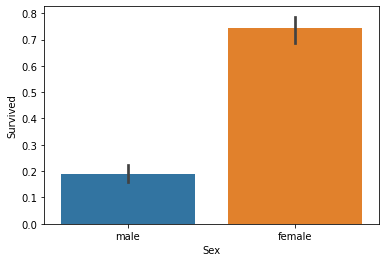

In [5]:
import seaborn as sns

sns.barplot(x="Sex",y="Survived",data=df_train)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

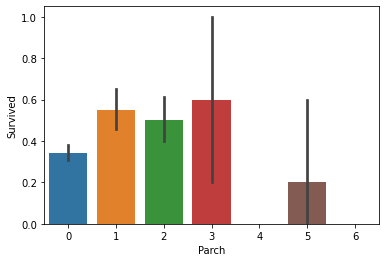

In [6]:
sns.barplot(x="Parch",y="Survived",data=df_train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

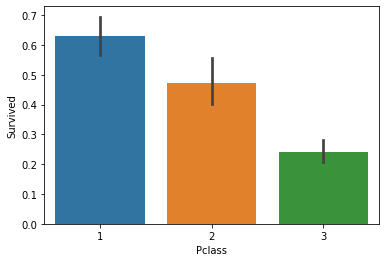

In [7]:
sns.barplot(x="Pclass",y="Survived",data=df_train)

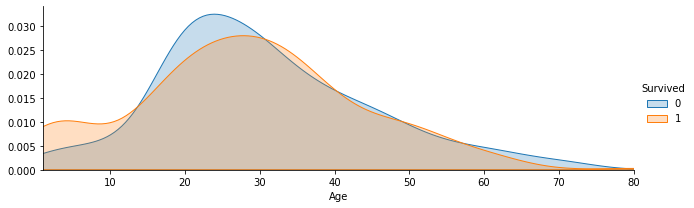

In [8]:
facet = sns.FacetGrid(df_train,hue="Survived",aspect=3)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(1,df_train["Age"].max()))
facet.add_legend()

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

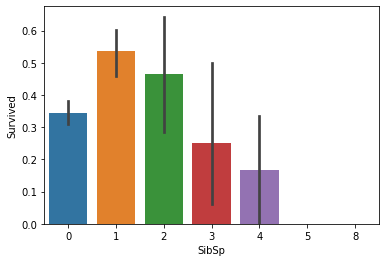

In [9]:
sns.barplot(x="SibSp",y="Survived",data=df_train)

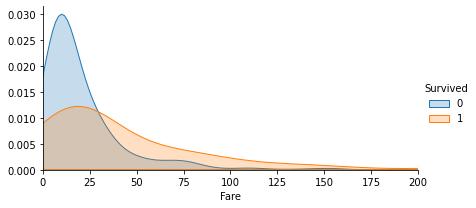

In [10]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, 200))
facet.add_legend()

In [11]:

def pre_operate(data):
    data=data.drop(["Cabin","Ticket","Name"],axis=1) #将Ticket Name Cabin删除
    data["Age"] = data["Age"].fillna(data["Age"].mean()) #将Age的缺失4值该列的平均值
    data=data.dropna()#删除掉有缺失值(Embarked)的行
    #将object类型转为int类型，来便于处理
    data["Sex"]=(data["Sex"]=='male').astype(int)
    ls=data["Embarked"].unique().tolist()
    data["Embarked"]=data["Embarked"].apply(lambda x:ls.index(x))
    return data


In [12]:
df_train=pre_operate(df_train)
df_test =pre_operate(df_test)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


In [42]:
from sklearn.model_selection import train_test_split
X = df_train.loc[:,df_train.columns!="Survived"]#将数据和标记分开
Y = df_train.loc[:,df_train.columns=="Survived"]

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
887,888,1,0,19.000000,0,0,30.0000,0
55,56,1,1,29.699118,0,0,35.5000,0
479,480,3,0,2.000000,0,1,12.2875,0
248,249,1,1,37.000000,1,1,52.5542,0
90,91,3,1,29.000000,0,0,8.0500,0


In [45]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
884,885,3,1,25.0,0,0,7.0500,0
626,627,2,1,57.0,0,0,12.3500,2
628,629,3,1,26.0,0,0,7.8958,0
698,699,1,1,49.0,1,1,110.8833,1
337,338,1,0,41.0,0,0,134.5000,1


In [46]:
Y_train.head()

,Survived
887,1
55,1
479,1
248,1
90,0


In [47]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV  #网格搜索

In [48]:
params={
        "splitter":("best","random") #划分
         ,"criterion":("gini","entropy") #评估指标
         ,"max_depth":[*range(1,8)] #最大深度
         ,"min_samples_leaf":[*range(5,21,5)] 
        }
clf=tree.DecisionTreeClassifier()
GS=GridSearchCV(clf,params,cv=5)
GS.fit(X_train,Y_train)
print(GS.best_params_)  #最佳参数
print(GS.best_score_)  #最优评分（对应最佳参数）


{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'splitter': 'best'}
0.816709677419355


In [49]:
#使用最优参数来进行训练
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=7,min_samples_leaf=5,splitter="best")
clf.fit(X_train,Y_train)
score=clf.score(X_train,Y_train)
print(score)

0.8697749196141479


In [51]:
score = clf.score(X_test,Y_test)
print(score)

0.8089887640449438


In [53]:
clf.predict(df_test)#对测试集进行预测

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,